In [81]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [82]:
data_kicksharing = pd.read_csv('kicksharing.csv')

# **Разведочный анализ данных (EDA)**

Таргет = 'nominal_price_rub_amt'

In [83]:
data_kicksharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [84]:
data_kicksharing = data_kicksharing.drop(['order_rk', 'party_rk'], axis= 1)

data_kicksharing.head()

,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [85]:
data_kicksharing['gender_cd'] = data_kicksharing['gender_cd'].apply(
    lambda x: (
        0 if x == 'M'
          else 1
        )
    )

In [86]:
data_kicksharing['created_dttm'] = pd.to_datetime(data_kicksharing['created_dttm'])
data_kicksharing['book_start_dttm'] = pd.to_datetime(data_kicksharing['book_start_dttm'])
data_kicksharing['book_end_dttm'] = pd.to_datetime(data_kicksharing['book_end_dttm'])

data_kicksharing['time_before_start'] = (data_kicksharing['book_start_dttm'] - data_kicksharing['created_dttm']).dt.total_seconds()

data_kicksharing['time_length_trip'] = (data_kicksharing['book_end_dttm'] - data_kicksharing['book_start_dttm']).dt.total_seconds()

In [87]:
data_kicksharing = data_kicksharing.drop(['book_time_zone_cd', 'created_dttm', 'book_start_dttm', 'book_end_dttm'], axis= 1)

data_kicksharing.head()

,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,time_before_start,time_length_trip
0,0,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 11:47:29.325252,134.79,19.48,NaN,4.325252,1230.014272
1,1,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:24.586000,109.43,40.30,NaN,4.586000,414.833607
2,0,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 07:34:59.476000,71.93,10.79,NaN,198.476000,410.688372
3,0,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:13.162000,76.97,7.70,NaN,4.162000,138.562918
4,0,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:43.017125,126.89,25.38,NaN,3.017125,605.429337


In [88]:
data_kicksharing['local_book_start_dttm'] = pd.to_datetime(data_kicksharing['local_book_start_dttm'])

data_kicksharing['month'] = data_kicksharing['local_book_start_dttm'].dt.month
data_kicksharing['day_of_week'] = data_kicksharing['local_book_start_dttm'].dt.day_of_week

data_kicksharing['time_period'] = data_kicksharing['local_book_start_dttm'].dt.hour.apply(
    lambda hour: (
        'Ночь_глубокая' if 0 <= hour < 6 else
        'Утро_раннее' if 6 <= hour < 9 else
        'Утро_пик' if 9 <= hour < 12 else
        'Обед' if 12 <= hour < 14 else
        'День_рабочий' if 14 <= hour < 18 else
        'Вечер_пик' if 18 <= hour < 21 else
        'Вечер_поздний'
    )
)
    

In [89]:
data_kicksharing = data_kicksharing.drop(['local_book_start_dttm'], axis= 1)

data_kicksharing.head()

,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,time_before_start,time_length_trip,month,day_of_week,time_period
0,0,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,134.79,19.48,NaN,4.325252,1230.014272,8,2,Утро_пик
1,1,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,109.43,40.30,NaN,4.586000,414.833607,10,3,День_рабочий
2,0,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,71.93,10.79,NaN,198.476000,410.688372,9,3,Утро_раннее
3,0,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,76.97,7.70,NaN,4.162000,138.562918,10,4,День_рабочий
4,0,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,126.89,25.38,NaN,3.017125,605.429337,7,2,Утро_раннее


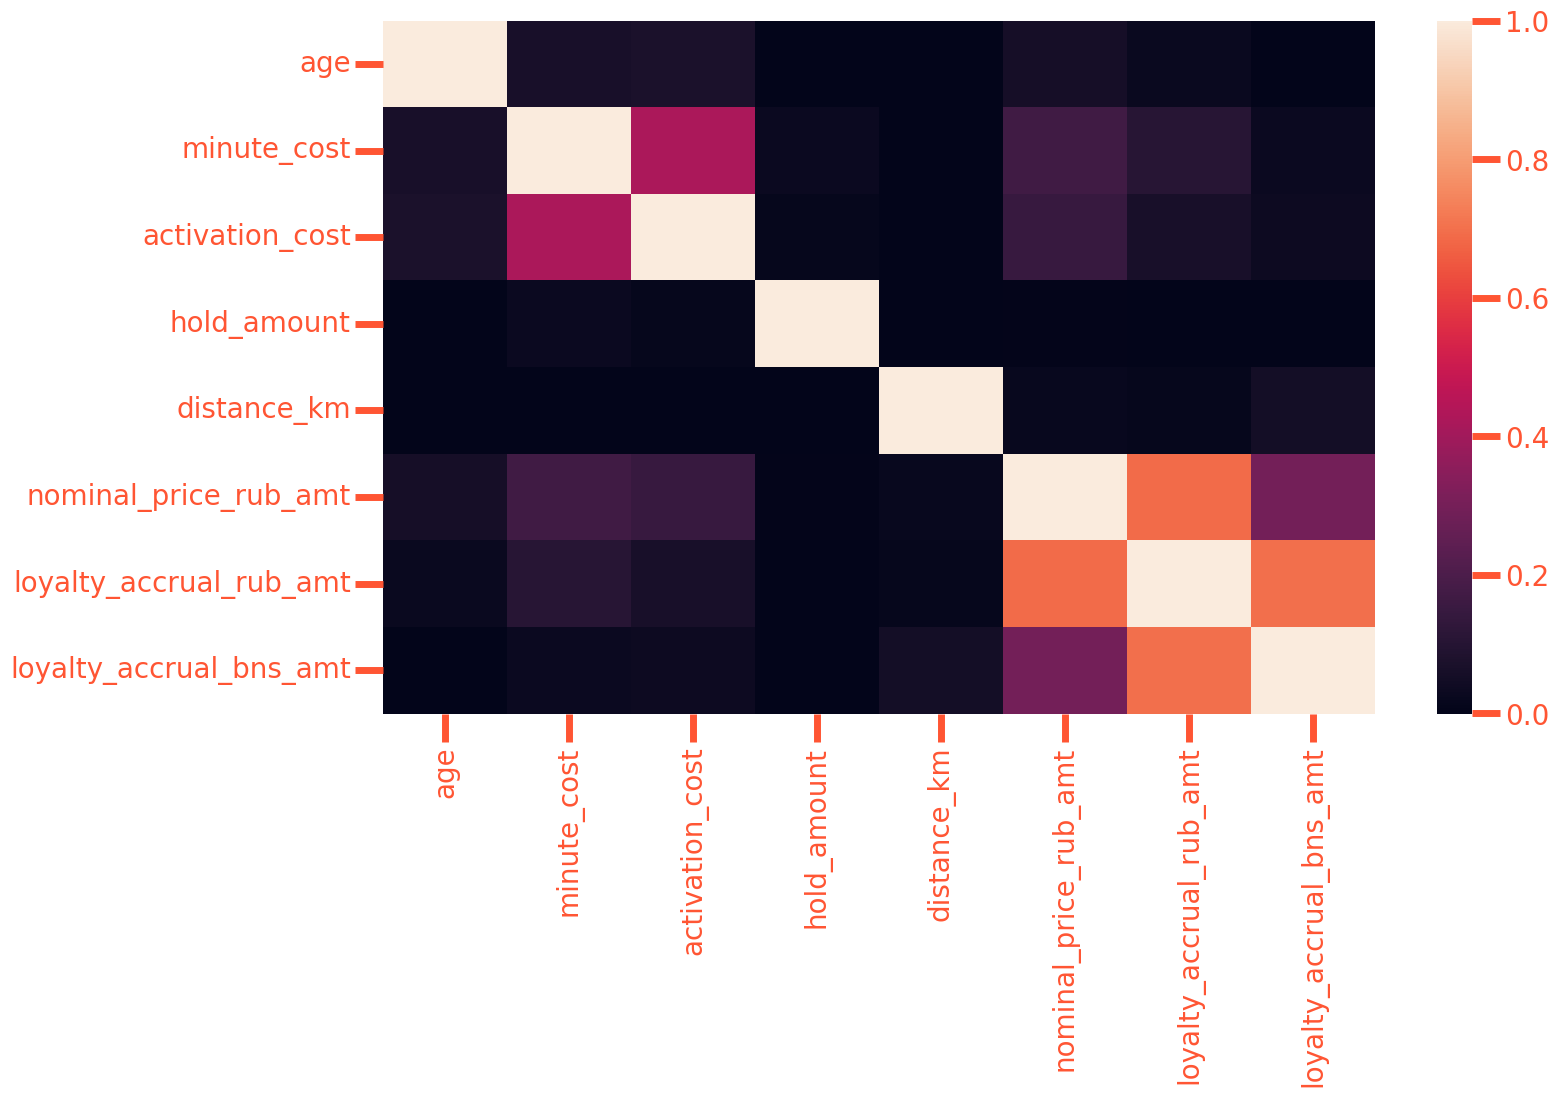

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 9)

sns.heatmap(data= data_kicksharing[['age', 'minute_cost', 'activation_cost', 'hold_amount', 'distance_km', 'nominal_price_rub_amt', 'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']].corr())
plt.show()

In [91]:
data_kicksharing = data_kicksharing.drop(['activation_cost', 'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt'], axis= 1)

data_kicksharing.head()

,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,hold_amount,transport_model,distance_km,nominal_price_rub_amt,time_before_start,time_length_trip,month,day_of_week,time_period
0,0,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,300.0,SL,3.690479,134.79,4.325252,1230.014272,8,2,Утро_пик
1,1,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,300.0,SL,1.114912,109.43,4.586000,414.833607,10,3,День_рабочий
2,0,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,300.0,E,1.515612,71.93,198.476000,410.688372,9,3,Утро_раннее
3,0,24,GRD,UNM,Г МОСКВА,8.99,300.0,SL,0.499411,76.97,4.162000,138.562918,10,4,День_рабочий
4,0,34,NaN,NaN,Г МОСКВА,6.99,300.0,SL,2.602028,126.89,3.017125,605.429337,7,2,Утро_раннее


In [92]:
data_kicksharing.describe()

,gender_cd,age,minute_cost,hold_amount,distance_km,nominal_price_rub_amt,time_before_start,time_length_trip,month,day_of_week
count,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000
mean,0.154483,31.544006,7.288688,299.983869,3.681031,127.647694,6.113834,686.459337,8.081291,2.943329
std,0.361412,9.434545,1.289492,1.939153,141.862349,100.122365,19.632011,790.490068,1.211937,1.944460
min,0.000000,12.000000,1.500000,80.000000,0.000000,0.000000,-1.738916,2.004000,4.000000,0.000000
25%,0.000000,24.000000,6.490000,300.000000,0.941054,80.840000,3.635664,285.783419,7.000000,1.000000
50%,0.000000,31.000000,7.490000,300.000000,1.729883,103.940000,4.204368,466.119018,8.000000,3.000000
75%,0.000000,37.000000,8.220000,300.000000,3.063694,142.100000,4.964000,802.262417,9.000000,5.000000
max,1.000000,94.000000,19.990000,500.000000,56012.640308,5627.640000,603.563000,42910.332373,10.000000,6.000000


In [93]:
data_kicksharing = data_kicksharing.drop(['hold_amount'], axis= 1)

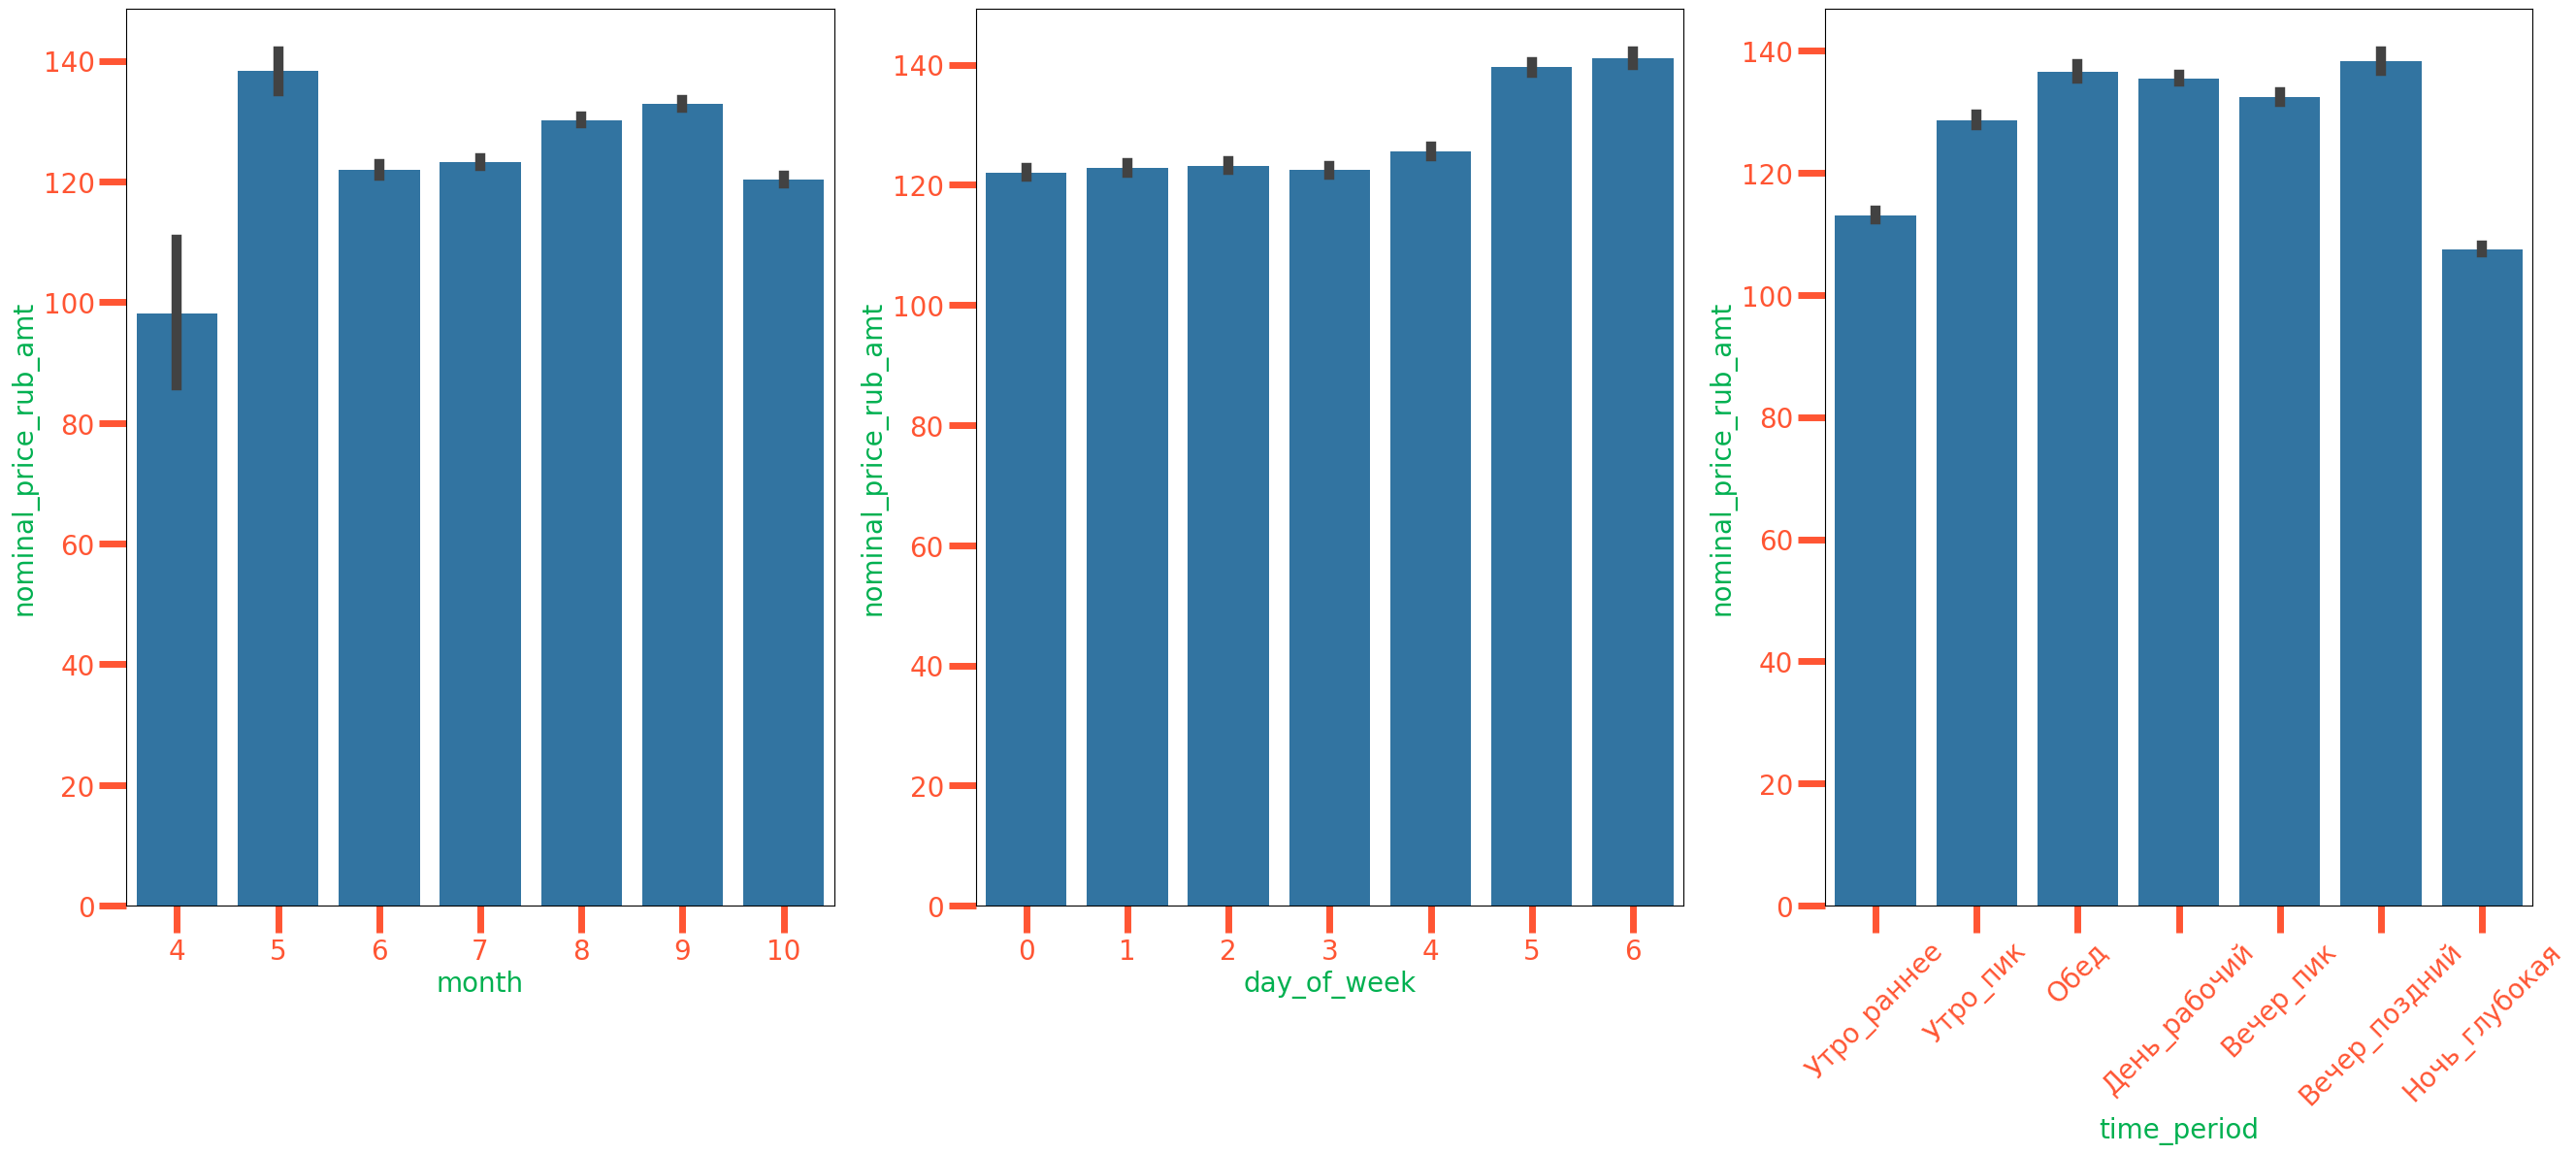

In [94]:
fig = plt.figure()
fig.set_size_inches(32, 12)

ax1 = fig.add_subplot(1, 3, 1)
sns.barplot(x='month', y='nominal_price_rub_amt', data= data_kicksharing)

ax2 = fig.add_subplot(1, 3, 2)
sns.barplot(x='day_of_week', y='nominal_price_rub_amt', data= data_kicksharing)

ax3 = fig.add_subplot(1, 3, 3)
sns.barplot(x='time_period', y='nominal_price_rub_amt', order= ['Утро_раннее', 'Утро_пик', 'Обед', 'День_рабочий', 'Вечер_пик', 'Вечер_поздний', 'Ночь_глубокая'], data= data_kicksharing)
plt.xticks(rotation=45)

plt.show()

# **ONE-HOT ENCODING**

In [95]:
data_kicksharing = pd.concat((data_kicksharing, pd.get_dummies(data_kicksharing['education_level_cd'], dtype=int)), axis= 1)
data_kicksharing = pd.concat((data_kicksharing, pd.get_dummies(data_kicksharing['marital_status_cd'], dtype=int)), axis= 1)

data_kicksharing = data_kicksharing.drop(['education_level_cd', 'marital_status_cd'], axis= 1)

data_a = data_kicksharing.copy()

data_kicksharing.head()

,gender_cd,age,lvn_state_nm,minute_cost,transport_model,distance_km,nominal_price_rub_amt,time_before_start,time_length_trip,month,...,ACD,GRD,PGR,SCH,UGR,CIV,DIV,MAR,UNM,WID
0,0,40,ТЮМЕНСКАЯ ОБЛ,4.99,SL,3.690479,134.79,4.325252,1230.014272,8,...,0,0,0,0,1,0,1,0,0,0
1,1,30,РОСТОВСКАЯ ОБЛ,8.49,SL,1.114912,109.43,4.586000,414.833607,10,...,0,1,0,0,0,0,0,1,0,0
2,0,28,СВЕРДЛОВСКАЯ ОБЛ,5.99,E,1.515612,71.93,198.476000,410.688372,9,...,0,0,0,0,1,0,0,0,1,0
3,0,24,Г МОСКВА,8.99,SL,0.499411,76.97,4.162000,138.562918,10,...,0,1,0,0,0,0,0,0,1,0
4,0,34,Г МОСКВА,6.99,SL,2.602028,126.89,3.017125,605.429337,7,...,0,0,0,0,0,0,0,0,0,0


# **MEAN TARGET ENCODING**

In [96]:
data_kicksharing['lvn_state_nm'] = data_kicksharing['lvn_state_nm'].map(data_kicksharing.groupby(['lvn_state_nm'])['nominal_price_rub_amt'].mean())
data_kicksharing['transport_model'] = data_kicksharing['transport_model'].map(data_kicksharing.groupby(['transport_model'])['nominal_price_rub_amt'].mean())
data_kicksharing['time_period'] = data_kicksharing['time_period'].map(data_kicksharing.groupby(['time_period'])['nominal_price_rub_amt'].mean())

In [97]:
data_kicksharing

,gender_cd,age,lvn_state_nm,minute_cost,transport_model,distance_km,nominal_price_rub_amt,time_before_start,time_length_trip,month,...,ACD,GRD,PGR,SCH,UGR,CIV,DIV,MAR,UNM,WID
0,0,40,114.584504,4.99,131.161125,3.690479,134.79,4.325252,1230.014272,8,...,0,0,0,0,1,0,1,0,0,0
1,1,30,127.211329,8.49,131.161125,1.114912,109.43,4.586000,414.833607,10,...,0,1,0,0,0,0,0,1,0,0
2,0,28,101.108066,5.99,108.441494,1.515612,71.93,198.476000,410.688372,9,...,0,0,0,0,1,0,0,0,1,0
3,0,24,130.670278,8.99,131.161125,0.499411,76.97,4.162000,138.562918,10,...,0,1,0,0,0,0,0,0,1,0
4,0,34,130.670278,6.99,131.161125,2.602028,126.89,3.017125,605.429337,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,0,18,101.108066,6.49,108.441494,1.555069,68.94,4.885000,354.660313,9,...,0,0,0,0,0,0,0,0,0,0
396745,0,23,137.672957,8.99,130.676481,2.270902,110.91,3.954000,491.638279,9,...,0,0,0,0,0,0,0,0,0,0
396746,0,20,114.584504,8.79,108.441494,1.411171,234.59,2.311487,1222.198631,9,...,0,0,0,0,0,0,0,0,0,0
396747,0,19,127.831286,7.49,131.161125,1.002400,79.96,2.401000,212.510827,9,...,0,0,0,0,0,0,0,0,0,0


In [98]:
data_kicksharing['lvn_state_nm'] = data_kicksharing['lvn_state_nm'].fillna(data_kicksharing['lvn_state_nm'].mean())

data_kicksharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gender_cd              396749 non-null  int64  
 1   age                    396749 non-null  int64  
 2   lvn_state_nm           396749 non-null  float64
 3   minute_cost            396749 non-null  float64
 4   transport_model        396749 non-null  float64
 5   distance_km            396749 non-null  float64
 6   nominal_price_rub_amt  396749 non-null  float64
 7   time_before_start      396749 non-null  float64
 8   time_length_trip       396749 non-null  float64
 9   month                  396749 non-null  int32  
 10  day_of_week            396749 non-null  int32  
 11  time_period            396749 non-null  float64
 12  ACD                    396749 non-null  int64  
 13  GRD                    396749 non-null  int64  
 14  PGR                    396749 non-nu

# **ОБУЧЕНИЕ МОДЕЛИ С ПОМОЩЬЮ SKLEARN**

In [99]:
### Отделим таргеты от объектов

X = data_kicksharing.drop('nominal_price_rub_amt', axis=1)
Y = data_kicksharing['nominal_price_rub_amt']

In [100]:
### Функция cross-validate

from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression

splitter = KFold(n_splits= 10, shuffle= True, random_state= 32)

model = LinearRegression()

cv_result = cross_validate(model, X, Y, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

print(f"Среднее MSE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

Среднее MSE на тренировочных фолдах: 442.751
Среднее MSE на тестовых фолдах: 443.001


In [101]:
# Анализ выбросов

top_quantile = data_kicksharing['nominal_price_rub_amt'].quantile(0.975)
low_quantile = data_kicksharing['nominal_price_rub_amt'].quantile(0.025)

print(f"Топ 2,5% значение таргета: {top_quantile.round(2)}")
print(f"Топ 97,5% значение таргета: {low_quantile.round(2)}")

data_kicksharing_new = data_kicksharing[
    (data_kicksharing['nominal_price_rub_amt']  > low_quantile) & (data_kicksharing['nominal_price_rub_amt']  < top_quantile)
    ]

data_kicksharing_new.shape

Топ 2,5% значение таргета: 361.61
Топ 97,5% значение таргета: 29.95


(376584, 22)

In [102]:
### Отделим таргеты от объектов

X_new = data_kicksharing_new.drop('nominal_price_rub_amt', axis=1)
Y_new = data_kicksharing_new['nominal_price_rub_amt']

In [103]:
### Функция cross-validate

from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression

splitter = KFold(n_splits= 10, shuffle= True, random_state= 32)

model = LinearRegression()

cv_result = cross_validate(model, X_new, Y_new, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

print(f"Среднее MSE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

Среднее MSE на тренировочных фолдах: 219.447
Среднее MSE на тестовых фолдах: 219.485


In [104]:
 # Метод прямого отбора

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()

sfs = SequentialFeatureSelector(model, n_features_to_select= 10)
sfs.fit(X_new, Y_new)

,estimator,LinearRegression()
,n_features_to_select,10
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [105]:
# Название включенных колонок

col = sfs.get_feature_names_out()

col

array(['age', 'lvn_state_nm', 'minute_cost', 'transport_model',
       'time_length_trip', 'month', 'day_of_week', 'time_period', 'SCH',
       'CIV'], dtype=object)

In [106]:
data_kicksharing_new[col]

,age,lvn_state_nm,minute_cost,transport_model,time_length_trip,month,day_of_week,time_period,SCH,CIV
0,40,114.584504,4.99,131.161125,1230.014272,8,2,128.541055,0,0
1,30,127.211329,8.49,131.161125,414.833607,10,3,135.451940,0,0
2,28,101.108066,5.99,108.441494,410.688372,9,3,113.046662,0,0
3,24,130.670278,8.99,131.161125,138.562918,10,4,135.451940,0,0
4,34,130.670278,6.99,131.161125,605.429337,7,2,113.046662,0,0
...,...,...,...,...,...,...,...,...,...,...
396744,18,101.108066,6.49,108.441494,354.660313,9,2,136.553718,0,0
396745,23,137.672957,8.99,130.676481,491.638279,9,1,132.360734,0,0
396746,20,114.584504,8.79,108.441494,1222.198631,9,1,135.451940,0,0
396747,19,127.831286,7.49,131.161125,212.510827,9,3,132.360734,0,0


In [107]:
### Отделим таргеты от объектов

X_new = data_kicksharing_new[col]
Y_new = data_kicksharing_new['nominal_price_rub_amt']

In [108]:
### Функция cross-validate

from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression

splitter = KFold(n_splits= 10, shuffle= True, random_state= 32)

model = LinearRegression()

cv_result = cross_validate(model, X_new, Y_new, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

print(f"Среднее MSE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

Среднее MSE на тренировочных фолдах: 219.622
Среднее MSE на тестовых фолдах: 219.645


In [109]:
# Относительная ошибка
mean_price = Y_new.mean()
rmse = ((-np.mean(cv_result['test_score'])) ** (1/2))  # RMSE

relative_error = ((rmse / mean_price) * 100).round(2)

print(f"Относительная ошибка предсказания: {relative_error}%")

Относительная ошибка предсказания: 12.41%
